In [1]:
%load_ext autoreload
%autoreload 2
viz_cortex = __import__('03_viz_cortex')
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import h5py
import pickle as pkl
from copy import deepcopy
import matplotlib.pyplot as plt
import os.path
import sys
sys.path.append('..')
fit_decoding = __import__('02_fit_decoding')

In [3]:
corrs_thresh, coefs, norms, contributions_test = \
    viz_cortex.load_corrs_and_coefs()

loading /home/chansingh/mntv1/deep-fMRI/results/encoding/bert-10__ndel=4/UTS03/norms_rotten_tomatoes_bert-10__ndel=4fmri_perc=0_seed=1.pkl


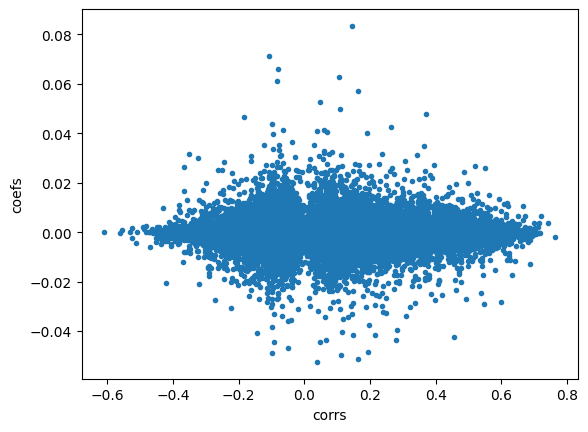

In [4]:
plt.plot(corrs_thresh, contributions_test, '.')
plt.xlabel('corrs')
plt.ylabel('coefs')
plt.show()

# Sanity checks

In [31]:
import cortex

In [27]:
encoding_result_dir='/home/chansingh/mntv1/deep-fMRI/results/encoding/bert-10__ndel=4/UTS03/'

In [37]:
corrs_val = np.load(join(encoding_result_dir, 'corrs.npz'))['arr_0']

In [38]:
weights.shape

(768, 95556)

In [ ]:
viz_cortex.quickshow(weights)

## Look at rois

In [3]:
roi_verts = cortex.get_roi_verts('UTS03', 'FFA')

In [4]:
roi_verts

{'FFA': array([ 46390,  46398,  46399, ..., 236655, 236656, 237981])}

Cutting 73 overlapping voxels (should be < ~50)
Index keys for which ROI is which in `index_volume`:
{'S1F': 1, 'M1F': 2, 'TOS': 3, 'FEF': 4, 'S1M': 5, 'sPMv': 6, 'EBA': 7, 'SMFA': 8, 'IPS ': 9, 'PMvh': 10, 'FBA': 11, 'S2H': 12, 'S2F': 13, 'FFA': 14, 'OFA': 15, 'SMHA': 16, 'RSC': 17, 'Broca': 18, 'S2M': 19, 'hMT': 20, 'AC': 21, 'IFSFP': 22, 'PPA': 23, 'M1M': 24, 'S1H': 25, 'M1H': 26}


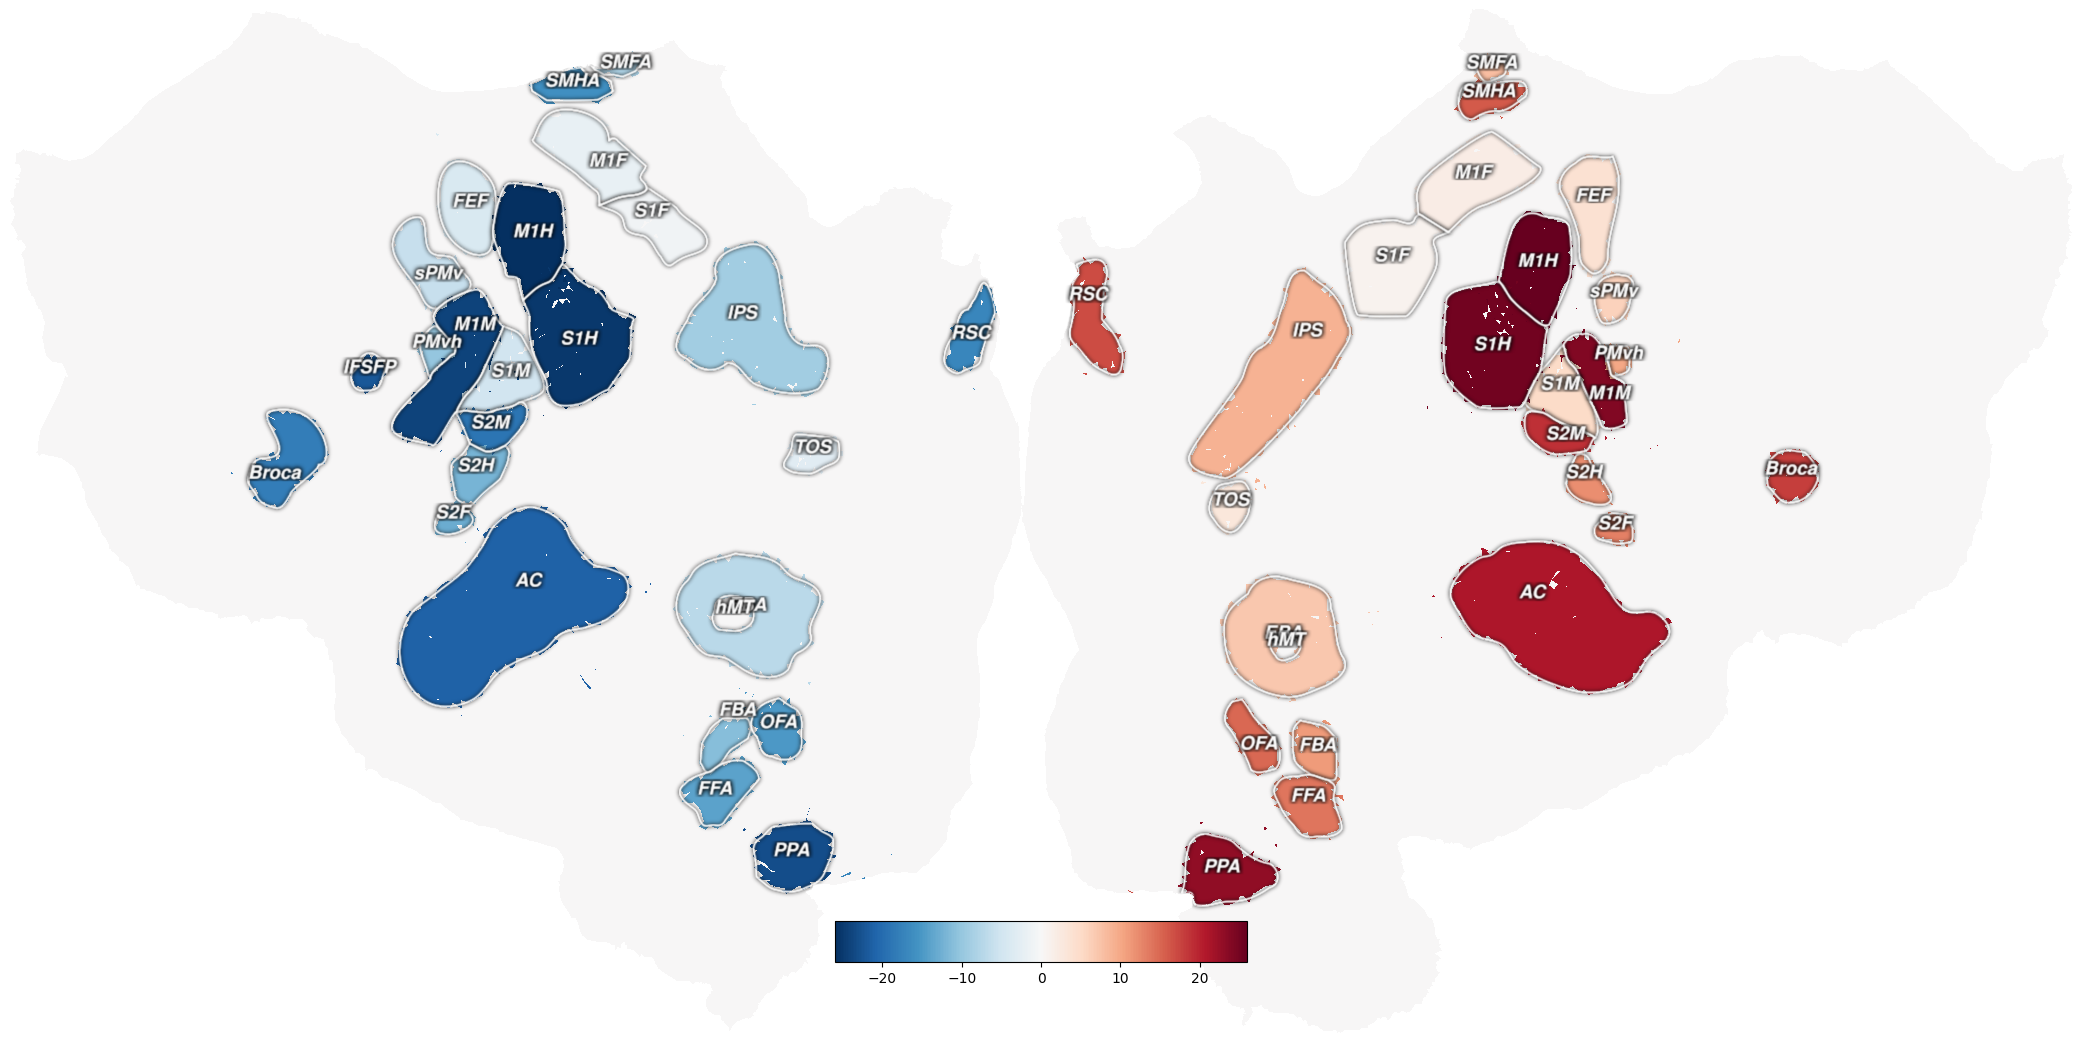

In [22]:
import cortex
import numpy as np
import matplotlib.pyplot as plt

subject = "UTS03"
xfm = "UTS03_auto"

# Get the map of which voxels are inside of our ROI
index_volume, index_keys = cortex.utils.get_roi_masks(subject, xfm,
                               roi_list=None, # Default (None) gives all available ROIs in overlays.svg
                            #    gm_sampler='cortical-conservative', # Select only voxels mostly within cortex
                               split_lr=True, # Separate left/right ROIs (this occurs anyway with index volumes)
                               threshold=0.9, # convert probability values to boolean mask for each ROI
                               return_dict=False # return index volume, not dict of masks
                               )

lim = np.max(np.abs(index_volume))
# Plot the mask for one ROI onto a flatmap
roi_data = cortex.Volume(index_volume, subject, xfm,
                         vmin=-lim, # This is a probability mask, so only
                         vmax=lim, # so scale btw zero and one
                         cmap="RdBu_r", # Shades of blue for L hem, red for R hem ROIs
                         )

cortex.quickflat.make_figure(roi_data,
                             thick=1, # select a single depth (btw white matter & pia)
                             sampler='nearest', # no interpolation
                             with_curvature=True,
                             with_colorbar=True,
                             )
print("Index keys for which ROI is which in `index_volume`:")
print(index_keys)
plt.show()

In [10]:
index_volume.shape

(54, 84, 84)

In [19]:
(index_volume!=0).sum()

6511

In [13]:
np.unique(index_volume)

array([-26, -25, -24, -23, -22, -21, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  21,  23,  24,  25,  26])

In [21]:
index_volume.flatten().shape

(381024,)